In [1]:
from gradio_client import Client

/home/jose/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
import random

client = Client("https://tencentarc-t2i-adapter-sdxl.hf.space/")

seed = random.randint(0, 2147483647)

result = client.predict(
				"./data/first_image.png",	# str (filepath or URL to image) in 'Input image' Image component
				"Realistic robotic arm anchored to a white table and a small qubic object on the table. White plain background and soft lighting.",	# str in 'Prompt' Textbox component
				"extra digit, fewer digits, cropped, worst quality, low quality, glitch, deformed, mutated, ugly, disfigured, strong reflections, strong lights",	# str in 'Negative prompt' Textbox component
				"canny",	# str (Option from: ['canny', 'sketch', 'lineart', 'depth-midas', 'depth-zoe', 'openpose'])in 'Adapter name' Dropdown component
				"Photographic",	# str (Option from: ['(No style)', 'Cinematic', '3D Model', 'Anime', 'Digital Art', 'Photographic', 'Pixel art', 'Fantasy art', 'Neonpunk', 'Manga'])in 'Style' Dropdown component
				20,	# int | float (numeric value between 1 and 50) in 'Number of steps' Slider component
				10,	# int | float (numeric value between 0.1 and 30.0) in 'Guidance scale' Slider component
				1,	# int | float (numeric value between 0.5 and 1) in 'Adapter conditioning scale' Slider component
				1,	# int | float (numeric value between 0.5 and 1.0) in 'Adapter conditioning factor' Slider component
				seed,	# int | float (numeric value between 0 and 2147483647) in 'Seed' Slider component
				True,	# bool in 'Apply preprocess' Checkbox component
				api_name="/run"
)
print(result)

Loaded as API: https://tencentarc-t2i-adapter-sdxl.hf.space/ ✔
/tmp/gradio/2056403f-c794-4b25-a4f8-3d7d32dc23fb


/tmp/gradio/2056403f-c794-4b25-a4f8-3d7d32dc23fb/6d29fc59b1e9189fb95690620b9067f72ab7e28e/image.png
/tmp/gradio/2056403f-c794-4b25-a4f8-3d7d32dc23fb/796d0035aa1555274bb4a39cc5ca126579206864/image.png


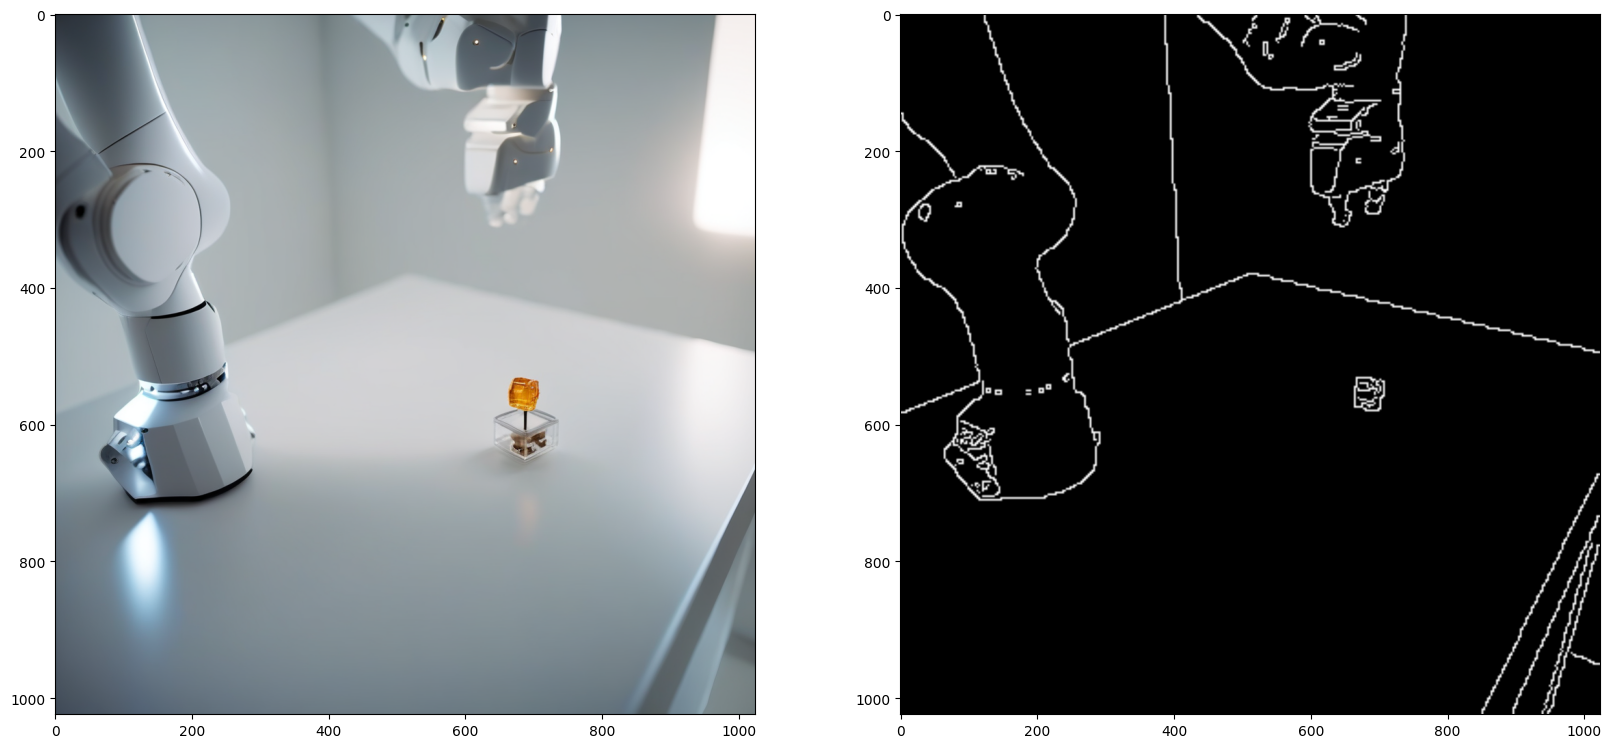

In [35]:
import os
import matplotlib.pyplot as plt

directory = result  # Replace 'result' with the actual variable name

# Traverse the directory and its subdirectories
imgs = []

for root, dirs, files in os.walk(directory):
    # Iterate over the files in the current directory
    for file in files:
        # Check if the file is an image (you can modify the condition based on your specific requirements)
        if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.jpeg'):
            # Print the path of the image file
            print(os.path.join(root, file))
            # show image
            imgs.append(plt.imread(os.path.join(root, file)))

plt.figure(figsize=(20, 20))
columns = 2
for i, image in enumerate(imgs):
    plt.subplot(int(len(imgs) / columns) + 1, columns, i + 1)
    plt.imshow(image)
plt.show()
